<a href="https://colab.research.google.com/github/lineality/DS-Unit-2-Kaggle-Challenge/blob/master/module3/GGA_2_2_3_v2_assignment_kaggle_challenge_3_Geoffrey_Gordon_Ashbrook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 3


## Assignment
- [ ] [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Continue to participate in our Kaggle challenge. 
- [ ] Use scikit-learn for hyperparameter optimization with RandomizedSearchCV.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Reading
- Jake VanderPlas, [Python Data Science Handbook, Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html), Hyperparameters and Model Validation
- Jake VanderPlas, [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers?slide=107)
- Ron Zacharski, [A Programmer's Guide to Data Mining, Chapter 5](http://guidetodatamining.com/chapter5/), 10-fold cross validation
- Sebastian Raschka, [A Basic Pipeline and Grid Search Setup](https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/svm_iris_pipeline_and_gridsearch.ipynb)
- Peter Worcester, [A Comparison of Grid Search and Randomized Search Using Scikit Learn](https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)

### Doing
- Add your own stretch goals!
- Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/). See the previous assignment notebook for details.
- In additon to `RandomizedSearchCV`, scikit-learn has [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Another library called scikit-optimize has [`BayesSearchCV`](https://scikit-optimize.github.io/notebooks/sklearn-gridsearchcv-replacement.html). Experiment with these alternatives.
- _[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)_ discusses options for "Grid-Searching Which Model To Use" in Chapter 6:

> You can even go further in combining GridSearchCV and Pipeline: it is also possible to search over the actual steps being performed in the pipeline (say whether to use StandardScaler or MinMaxScaler). This leads to an even bigger search space and should be considered carefully. Trying all possible solutions is usually not a viable machine learning strategy. However, here is an example comparing a RandomForestClassifier and an SVC ...

The example is shown in [the accompanying notebook](https://github.com/amueller/introduction_to_ml_with_python/blob/master/06-algorithm-chains-and-pipelines.ipynb), code cells 35-37. Could you apply this concept to your own pipelines?


### BONUS: Stacking!

Here's some code you can use to "stack" multiple submissions, which is another form of ensembling:

```python
import pandas as pd

# Filenames of your submissions you want to ensemble
files = ['submission-01.csv', 'submission-02.csv', 'submission-03.csv']

target = 'status_group'
submissions = (pd.read_csv(file)[[target]] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission[target] = majority_vote
submission.to_csv('my-ultimate-ensemble-submission.csv', index=False)
```

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
import pandas as pd

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

#"Dictionary" of header meanings

https://www.kaggle.com/c/ds8-predictive-modeling-challenge/data

    amount_tsh : Total static head (amount water available to waterpoint)
    date_recorded : The date the row was entered
    funder : Who funded the well
    gps_height : Altitude of the well
    installer : Organization that installed the well
    longitude : GPS coordinate
    latitude : GPS coordinate
    wpt_name : Name of the waterpoint if there is one
    num_private :
    basin : Geographic water basin
    subvillage : Geographic location
    region : Geographic location
    region_code : Geographic location (coded)
    district_code : Geographic location (coded)
    lga : Geographic location
    ward : Geographic location
    population : Population around the well
    public_meeting : True/False
    recorded_by : Group entering this row of data
    scheme_management : Who operates the waterpoint
    scheme_name : Who operates the waterpoint
    permit : If the waterpoint is permitted
    construction_year : Year the waterpoint was constructed
    extraction_type : The kind of extraction the waterpoint uses
    extraction_type_group : The kind of extraction the waterpoint uses
    extraction_type_class : The kind of extraction the waterpoint uses
    management : How the waterpoint is managed
    management_group : How the waterpoint is managed
    payment : What the water costs
    payment_type : What the water costs
    water_quality : The quality of the water
    quality_group : The quality of the water
    quantity : The quantity of water
    quantity_group : The quantity of water
    source : The source of the water
    source_type : The source of the water
    source_class : The source of the water
    waterpoint_type : The kind of waterpoint
    waterpoint_type_group : The kind of waterpoint

Labels

There are three possible values:

    functional : the waterpoint is operational and there are no repairs needed
    functional needs repair : the waterpoint is operational, but needs repairs
    non functional : the waterpoint is not operational


# Goals:
## 1. Try Ordinal Encoding.
## 2. Try a Random Forest Classifier.
## 3. Submit your predictions to our Kaggle competition.

#Code Begins Here:

##1. Import Libraries etc.

In [0]:
%%capture
import sys


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [0]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

In [0]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
import graphviz
from sklearn.tree import export_graphviz

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [0]:
import itertools
import seaborn as sns

In [0]:
from scipy.stats import randint, uniform
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.pipeline import make_pipeline

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
#df['year_constructed'].plot()

In [31]:
train['construction_year'].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [32]:
train['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [33]:
train['amount_tsh'].describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [34]:
train['gps_height'].describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

#Split
## Note: I am going to try experimenting with different train-split ratios to see how that affects results...


e.g. 60-40 vs. 95-5



In [0]:
# Split train into train & val
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, train_size=0.999, test_size=0.001, 
                              stratify=train['status_group'], random_state=42)

# Exploration 
## & Wrangling

I am going to try to remove more outliers, and experiment with co-linear/duplicate features (may or may not affect validation score)



# Note:

outliers:
district code

population zero... 

construction year: 
feature engineering...







## Q: Which are the main contributing factors?

- longitude
- latitude
- quantity_group
- quantity_group
- id
- wpt_name
- subvillage
- construction_year
- gps_height
- extraction_type_class



In [36]:
train.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005386,-0.004782,-0.001046,0.001474,-0.002614,-0.002920,-0.002919,-0.002697,-0.002008
amount_tsh,-0.005386,1.000000,0.076562,0.022118,-0.052678,0.002945,-0.026775,-0.023572,0.016309,0.067861
gps_height,-0.004782,0.076562,1.000000,0.149077,-0.035633,0.007237,-0.183453,-0.171296,0.134971,0.658721
longitude,-0.001046,0.022118,0.149077,1.000000,-0.425789,0.023884,0.034211,0.151378,0.086571,0.396656
latitude,0.001474,-0.052678,-0.035633,-0.425789,1.000000,0.006846,-0.221066,-0.201003,-0.022129,-0.244988
num_private,-0.002614,0.002945,0.007237,0.023884,0.006846,1.000000,-0.020386,-0.004484,0.003814,0.026069
region_code,-0.002920,-0.026775,-0.183453,0.034211,-0.221066,-0.020386,1.000000,0.678653,0.094101,0.031817
district_code,-0.002919,-0.023572,-0.171296,0.151378,-0.201003,-0.004484,0.678653,1.000000,0.061825,0.048301
population,-0.002697,0.016309,0.134971,0.086571,-0.022129,0.003814,0.094101,0.061825,1.000000,0.260880
construction_year,-0.002008,0.067861,0.658721,0.396656,-0.244988,0.026069,0.031817,0.048301,0.260880,1.000000


In [37]:
train.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
54842,67114,3000.0,2011-03-18,Danida,1994,DANID,34.757670,-9.718651,none,0,Lake Nyasa,Manzese,Iringa,11,5,Ludewa,Madilu,185,True,GeoData Consultants Ltd,VWC,DANIDA,False,1994,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8213,73586,0.0,2011-08-14,Jaica,0,Jaica,33.290738,-2.708937,Ihale,0,Lake Victoria,Ihale,Mwanza,19,4,Kwimba,Ngulla,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,afridev,afridev,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
43296,43038,0.0,2011-03-31,World Bank,0,Commu,35.597131,-6.211929,Kwa Chigono,0,Internal,Mwenge,Dodoma,1,5,Dodoma Urban,Zuzu,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,non functional


In [38]:
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59340.000000,59340.000000,59340.000000,59340.000000,5.934000e+04,59340.000000,59340.000000,59340.000000,59340.000000,59340.000000
mean,37105.933350,317.579337,668.353674,34.077810,-5.706451e+00,0.474621,15.296849,5.631193,179.972632,1300.653387
std,21452.365999,2998.745172,693.134681,6.567185,2.945864e+00,12.242405,17.588259,9.637350,471.679042,951.618337
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18512.750000,0.000000,0.000000,33.091733,-8.541139e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37047.500000,0.000000,369.000000,34.908825,-5.022271e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55644.250000,20.000000,1320.000000,37.178682,-3.326288e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [39]:
train.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59340,55705,55685,59340,59340,58969,59340,59340,59340,56011,59340,55468,31206,56284,59340,59340,59340,59340,59340,59340,59340,59340,59340,59340,59340,59340,59340,59340,59340,59340,59340
unique,356,1897,2144,37363,9,19276,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9070,17382,3560,10234,508,5289,2500,307,50960,59340,36754,682,38809,26753,26753,26753,40466,52436,25321,25321,50771,50771,33154,33154,17004,17004,45747,28495,34591,32226


In [0]:
data = train
from pandas.plotting import scatter_matrix
#scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal='kde')

In [0]:
import seaborn as sns
#sns.set(style="ticks")

#df = train
#sns.pairplot(df, hue="id")

# Wrangling Via Function 
## For: Train, Val, Test

In [0]:
def wrangle(X):
  """Wrangle train, validate, and test sets in the same way"""
    
  # Prevent SettingWithCopyWarning
  X = X.copy()
    
  # About 3% of the time, latitude has small values near zero,
  # outside Tanzania, so we'll treat these values like zero.
  X['latitude'] = X['latitude'].replace(-2e-08, 0)

  # When columns have zeros and shouldn't, they are like null values.
  # So we will replace the zeros with nulls, and impute missing values later.
  cols_with_zeros = ['longitude', 'latitude', 'construction_year']
  for col in cols_with_zeros:
    X[col] = X[col].replace(0, np.nan)

  # duplicates, so drop one
  # for 1 column
  #X = X.drop(columns='quantity_group')
  # for more than 1
  # ,'id'
  X = X.drop(columns=['quantity_group','region_code'])

  # interestingly, this made the results worse...neato
  # replace population zero with NaN
  # X['population'] = X['population'].replace(0, np.NaN)

  #region code and district code are very similar according to .corr
  #X = X.drop(columns='region_code')
  # drop ID number

  # return the wrangled dataframe
  return X

In [0]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [44]:
train.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
54842,67114,3000.0,2011-03-18,Danida,1994,DANID,34.757670,-9.718651,none,0,Lake Nyasa,Manzese,Iringa,5,Ludewa,Madilu,185,True,GeoData Consultants Ltd,VWC,DANIDA,False,1994.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8213,73586,0.0,2011-08-14,Jaica,0,Jaica,33.290738,-2.708937,Ihale,0,Lake Victoria,Ihale,Mwanza,4,Kwimba,Ngulla,0,True,GeoData Consultants Ltd,VWC,NaN,True,NaN,afridev,afridev,handpump,vwc,user-group,never pay,never pay,soft,good,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
43296,43038,0.0,2011-03-31,World Bank,0,Commu,35.597131,-6.211929,Kwa Chigono,0,Internal,Mwenge,Dodoma,5,Dodoma Urban,Zuzu,0,True,GeoData Consultants Ltd,VWC,NaN,False,NaN,other,other,other,vwc,user-group,never pay,never pay,soft,good,dry,shallow well,shallow well,groundwater,other,other,non functional


# Family of Variables
## Creating & Naming the main family of re-used variables

In [93]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'district_code', 'population', 'construction_year', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

# Deploy Model: 1
# Forest With Ordinal Encoding

class sklearn.ensemble.RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)

In [52]:
%%time

# Arrange data into X features matrix and y target vector
# so we use *all* features, including high-cardinality categoricals
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

# This pipeline is identical to the example cell above,
# except we're replacing one-hot encoder with "ordinal" encoder
# max_depth=16, min_samples_leaf=4, random_state=42
pipeline = make_pipeline(
    #ce.OneHotEncoder(use_cat_names=True), 
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=110,
                           #criterion=’mse’,
                           #max_depth=None, 
                           min_samples_split=3,
                           min_samples_leaf=2, 
                           #min_weight_fraction_leaf=0.0, 
                           #max_features=’auto’, 
                           #max_leaf_nodes=100, 
                           #min_impurity_decrease=.00000000000001,  
                           random_state=43, 
                           n_jobs=-1)
)



CPU times: user 24.7 ms, sys: 1.99 ms, total: 26.7 ms
Wall time: 27.5 ms


In [54]:
# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8166666666666667


In [0]:
k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

past kaggle: 0.814874



- for 90% of data: 0.8195286195286196
- for 60% of data: 0.80593

for 97% solit
- Validation Accuracy 0.8198653198653199



# RandomizedSearchCV

In [0]:
import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



In [68]:


#this happen 300, times n_estimators x K
#features = train.columns.drop(target)
#X_train = train[features]
#y_train = train[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    #ce.TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=110,
                           #criterion=’mse’,
                           #max_depth=None, 
                           min_samples_split=3,
                           min_samples_leaf=2, 
                           #min_weight_fraction_leaf=0.0, 
                           #max_features=’auto’, 
                           #max_leaf_nodes=100, 
                           #min_impurity_decrease=.00000000000001,  
                           random_state=43, 
                           n_jobs=-1)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='accuracy')
print(f'MAE for {k} folds:', -scores)

SyntaxError: ignored

In [0]:
-scores.mean()

In [103]:
print('Model Hyperparameters:')
print(pipeline.named_steps['randomforestregressor'])

Model Hyperparameters:


KeyError: ignored

...

In [0]:


#target = 'id'
#high_cardinality = ['display_address', 'street_address', 'description']
#features = train.columns.drop([target] + high_cardinality)
#X_train = train[features]
#y_train = train[target]

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    SelectKBest(f_regression, k=20), 
    Ridge(alpha=1.0)
)

k = 2
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
# negative MAE
print(f'MAE for {k} folds:', -scores)

In [0]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#features = train.columns.drop([target] + high_cardinality)
#X_train = train[features]
#y_train = train[target]

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(), 
    SelectKBest(f_regression), 
    Ridge()
)

#double underscore
param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'selectkbest__k': range(1, len(X_train.columns)+1),
    # it is trying exactly these alphas, not stepsize) 
    'ridge__alpha': [0.1, 1, 10], 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=50, 
    cv=5, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

...

#Randomized Search CV

['status_group'].values.flatten()

pipeline.fit(train, train_labels['status_group'].values.flatten())

#### [Scikit-Learn User Guide, 3.2 Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html)

> [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values.
>
> For each parameter, either a distribution over possible values or a list of discrete choices (which will be sampled uniformly) can be specified.
>
> This example uses the `scipy.stats` module, which contains many useful distributions for sampling parameters.

In [0]:
from scipy.stats import randint, uniform
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.pipeline import make_pipeline

In [0]:

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=42)
)

param_distributions = {
    #'targetencoder__min_samples_leaf': randint(1, 1000), 
    #'targetencoder__smoothing': uniform(1, 1000), 
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1), 
}

# On Colab: decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    #~5 or 100?
    n_iter=2, 
    #~3
    cv=2, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    6.5s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   31.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   31.4s finished


In [85]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.9854198548310253, 'randomforestclassifier__n_estimators': 200, 'simpleimputer__strategy': 'mean'}
Cross-validation MAE -0.7191776204920796


In [86]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').T

,0,1
mean_fit_time,28.4322,2.89748
std_fit_time,0.187996,0.023289
mean_score_time,0.655661,0.720929
std_score_time,0.00130677,0.00496984
param_randomforestclassifier__max_depth,5,5
param_randomforestclassifier__max_features,0.98542,0.0702376
param_randomforestclassifier__n_estimators,200,120
param_simpleimputer__strategy,mean,mean
params,"{'randomforestclassifier__max_depth': 5, 'rand...","{'randomforestclassifier__max_depth': 5, 'rand..."
split0_test_score,0.718715,0.688416


In [87]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__max_features,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,28.432154,0.187996,0.655661,0.001307,5,0.98542,200,mean,"{'randomforestclassifier__max_depth': 5, 'rand...",0.718715,0.719640,0.719178,0.000462,1,0.722067,0.721850,0.721958,0.000109
1,2.897482,0.023289,0.720929,0.004970,5,0.0702376,120,mean,"{'randomforestclassifier__max_depth': 5, 'rand...",0.688416,0.675149,0.681783,0.006634,2,0.695810,0.677328,0.686569,0.009241


### Make predictions for test set

In [107]:
pipeline = search.best_estimator_
y_pred = pipeline.predict(X_test)

ValueError: ignored

In [0]:
pipeline = search.best_estimator_

In [0]:
from sklearn.metrics import mean_absolute_error

#X_test = test[features]
#y_test = test[target]

y_pred = pipeline.predict(X_test)
#mae = mean_absolute_error(y_test, y_pred)
#print(f'Test MAE: ${mae:,.0f}')

# Predict and Export

In [0]:
print('X_train shape before encoding', X_train.shape)

encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)
print('X_train shape after encoding', encoded.shape)

X_train shape before encoding (57618, 38)
X_train shape after encoding (57618, 38)


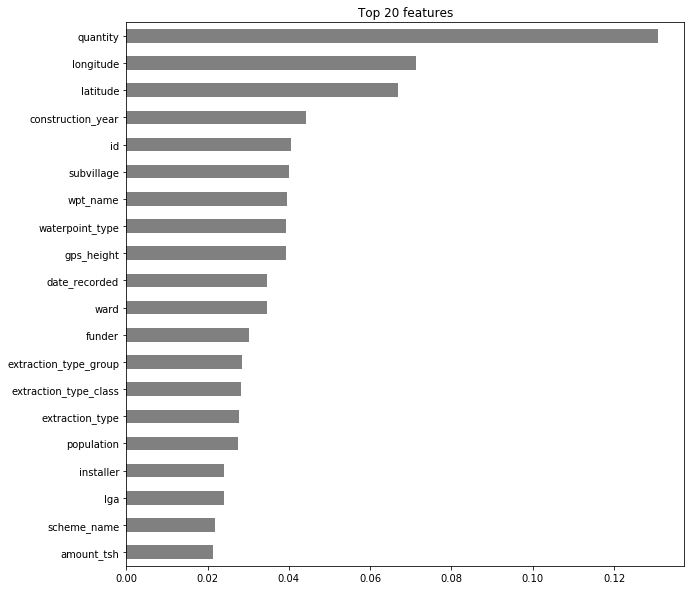

In [0]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

# Try Plotting a Validation Curve

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier()
)
# start, stop, max step
depth = range(1, 30, 3)
train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='decisiontreeregressor__max_depth', 
    param_range=depth, scoring='neg_mean_absolute_error', 
    cv=3,
    n_jobs=-1
)

plt.figure(dpi=150)
plt.plot(depth, np.mean(-train_scores, axis=1), color='blue', label='training error')
plt.plot(depth, np.mean(-val_scores, axis=1), color='red', label='validation error')
plt.title('Validation Curve')
plt.xlabel('model complexity: DecisionTreeRegressor max_depth')
plt.ylabel('model score: Mean Absolute Error')
plt.legend();

ValueError: ignored

# Test & Publish/Export

In [0]:
from google.colab import files

In [0]:
# Predict: Run Model (pipeline) on test(set)
#y_pred = pipeline.predict(X_test)
#submission['status_group'] = y_pred
#y_pred.shape

In [102]:
# alternatively, copy the test results directly into the template for submission
sample_submission['status_group'] = pipeline.predict(X_test)
print(sample_submission.shape)
#sample_submission.describe(exclude='number')
#sample_submission.head()
submission = sample_submission
#submission.describe(exclude='number')
#submission.head(2)

ValueError: ignored

In [0]:
submission.to_csv('submission_GGA_6.csv', index=False)

In [0]:
!ls

sample_data  submission_GGA_5.csv  submission_GGA_6.csv


In [0]:
files.download('submission_GGA_6.csv')

- Kaggle challenge: Submit new predictions daily. Competition ends 3:59pm Thursday.https://www.kaggle.com/t/a5448849381c4545a5d5e40529c80c05 (edited) 


...

In [0]:
from scipy.stats import randint, uniform
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.pipeline import make_pipeline

In [83]:

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=42)
)

param_distributions = {
    #'targetencoder__min_samples_leaf': randint(1, 1000), 
    #'targetencoder__smoothing': uniform(1, 1000), 
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1), 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=2, 
    cv=2, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    6.5s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   31.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   31.4s finished
